In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
im# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import tensorflow as tf
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/fruit-and-vegetable-image-recognition/train",
     shuffle = True,
      
)

Found 3115 files belonging to 36 classes.


In [6]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [7]:
Image_size =256
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/fruit-and-vegetable-image-recognition/train",
    shuffle = True ,
    batch_size = 32,
    image_size = (Image_size ,Image_size)
)

Found 3115 files belonging to 36 classes.


In [10]:
dataset.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [11]:

for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[35 12 33 31 30  8 25 24 30 17 14 20 35 21 33 26 27 26 31  9 20 18 17  2
  2  9 13 33 29  4 15 35]


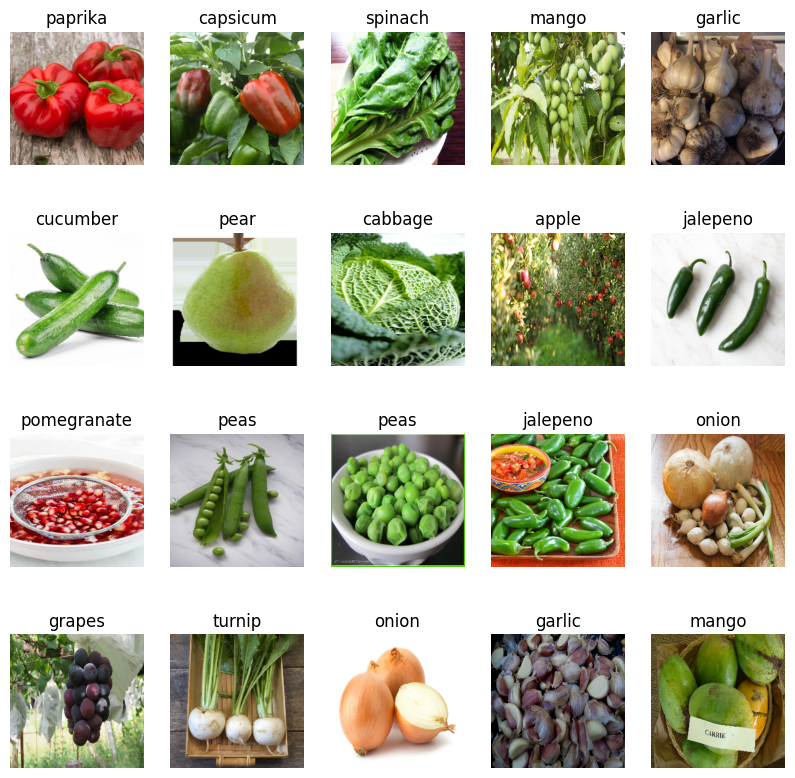

In [12]:
class_names = dataset.class_names
plt.figure(figsize = (10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(20):
          ax = plt.subplot(4,5 ,i+1)
          plt.imshow(image_batch[i].numpy().astype("uint8"))
          plt.title(class_names[label_batch[i]])
          plt.axis("off")
    

    

In [13]:
len(dataset)

98

In [14]:
train_size = 0.8
len(dataset)*train_size

78.4

In [15]:
train_ds = dataset.take(78)
len(train_ds)


78

In [16]:
test_size = 0.1 
len(dataset)*test_size

9.8

In [17]:
test_ds = dataset.skip(78)
len(test_ds)

20

In [18]:
val_size = 0.1 
len(dataset)*val_size
val_ds = test_ds.skip(10)
len(val_ds)

10

In [19]:
len(train_ds),len(test_ds) , len(val_ds)

(78, 20, 10)

In [21]:
from tensorflow.keras import layers , models , Sequential

In [25]:
#image rescaling and image resize 
data_resize = Sequential([
    layers.Resizing(Image_size , Image_size),
    layers.Rescaling(1./255),
])

In [26]:
data_agumentation  = tf.keras.Sequential([
    layers.RandomFlip("horizental_and_verticle"),
    layers.RandomRotation(0.2),
])

In [27]:
train_ds = train_ds.map(
    lambda x, y: (data_agumentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
import tensorflow as tf
from tensorflow.keras import Sequential , layers , models

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 36

# Define the Sequential model
model = models.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer= "adam", loss="SparseCategoricalCrossentropy" , metrics = ['accuracy'])
model.fit(train_ds ,batch_size =32 ,epochs =10 , validation_data = val_ds , verbose =1 )

              

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 497s 6s/step - accuracy: 0.0812 - loss: 3.2349 - val_accuracy: 0.1973 - val_loss: 2.9830
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 527s 7s/step - accuracy: 0.1523 - loss: 2.8324 - val_accuracy: 0.1940 - val_loss: 2.7584
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 558s 7s/step - accuracy: 0.2150 - loss: 2.6061 - val_accuracy: 0.2575 - val_loss: 2.5530
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 527s 7s/step - accuracy: 0.2352 - loss: 2.4885 - val_accuracy: 0.2776 - val_loss: 2.3979
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 534s 7s/step - accuracy: 0.2742 - loss: 2.3534 - val_accuracy: 0.2809 - val_loss: 2.4625
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 498s 6s/step - accuracy: 0.2937 - loss: 2.3055 - val_accuracy: 0.2676 - val_loss: 2.4162


In [ ]:
history 

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
type(history.history['loss'])
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss  =history.history['val_loss']

In [ ]:
import numpy as np
for label_batch  , image_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('int8')
    first_label = label_batch[0].numpy()
    print("first img to predict")
    plt.imshow(first_image)
    plt("actual label" , class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:" , class_names[np.agrmax(batch_prediction[0])])
    

In [ ]:
def predict(model , img):
    img_array = tf.keras.preprocessing.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array ,0 )
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(predictions[0])) , 2)
    return predicted_class ,confidence


In [ ]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class , confidence = predict(model , images[i].numpy())
        actul_class  = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [ ]:
model_version = 1
model.save(f"../models/{model_version}.keras")  # or use .h5 if you prefer
import os

model_version = 1
model_dir = "../models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
model.save(f"{model_dir}/{model_version}.keras")